# Phase 2 
#### Group Members: Anusha Bishayee, Katheryn Ding, Phoebe Wang, Kaiwen Zhou

---

### Research Question:  

#### How do ESG performance and stock performance correlate across industries? What associations can we find between industry, stock performance, and ESG rating?



---

### Data Collection and Cleaning

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
esg = pd.read_csv("esg_data.csv")
print(esg.iloc[0:15,:])

   ticker                              name currency  \
0     dis                    Walt Disney Co      USD   
1      gm                 General Motors Co      USD   
2     gww                   WW Grainger Inc      USD   
3     mhk             Mohawk Industries Inc      USD   
4     lyv     Live Nation Entertainment Inc      USD   
5     lvs              Las Vegas Sands Corp      USD   
6     clx                         Clorox Co      USD   
7    aacg             ATA Creativity Global      CNY   
8     aal       American Airlines Group Inc      USD   
9    aame            Atlantic American Corp      USD   
10   aaoi       Applied Optoelectronics Inc      USD   
11   aaon                          Aaon Inc      USD   
12   aapl                         Apple Inc      USD   
13   aatc       Autoscope Technologies Corp      USD   
14   aaww  Atlas Air Worldwide Holdings Inc      USD   

                         exchange                            industry  \
0   NEW YORK STOCK EXCHANGE, I

In [207]:
#cleaning to only have certain companies that represent a variety of industries

companies = ["Walt Disney Co", "American Airlines Group Inc", "Apple Inc", "eBay Inc", "Goldman Sachs Group Inc", 
             "Meta Platforms Inc", "Starbucks Corp", "PayPal Holdings Inc", "United Airlines Holdings Inc", 
             "Bath & Body Works Inc", "Abbvie Inc", "Alexandria Real Estate Equities Inc", 
             "Becton Dickinson and Co", "Brown & Brown Inc", "Duke Energy Corp", "T-Mobile US Inc",
             "Marathon Oil Corp", "Chipotle Mexican Grill Inc", "Target Corp", 
             "General Motors Co", "Salesforce Inc", "Tesla Inc", "Bank of America Corp"]

relevant_esg = esg[esg["name"].isin(companies)]
print(relevant_esg)

    ticker                                 name currency  \
0      dis                       Walt Disney Co      USD   
1       gm                    General Motors Co      USD   
8      aal          American Airlines Group Inc      USD   
12    aapl                            Apple Inc      USD   
163   ebay                             eBay Inc      USD   
170   meta                   Meta Platforms Inc      USD   
196   sbux                       Starbucks Corp      USD   
201   pypl                  PayPal Holdings Inc      USD   
212   tsla                            Tesla Inc      USD   
215   tmus                      T-Mobile US Inc      USD   
216    ual         United Airlines Holdings Inc      USD   
231   abbv                           Abbvie Inc      USD   
256    are  Alexandria Real Estate Equities Inc      USD   
261    bac                 Bank of America Corp      USD   
263   bbwi                Bath & Body Works Inc      USD   
264    bdx              Becton Dickinson

In [208]:
import yfinance as yf

In [209]:
#use yfinance to pull stock information of selected stocks.
relevant_esg.loc[:, 'ticker'] = relevant_esg['ticker'].astype(str)
relevant_esg.loc[:, 'name'] = relevant_esg['name'].astype(str)
tickers = relevant_esg['ticker'].tolist()
#Add Start Price, End Price, and Rate of Change (%) of each company to the dataset relevent.esg
relevant_esg.loc[:, 'Start Price'] = None
relevant_esg.loc[:, 'End Price'] = None
relevant_esg.loc[:, 'Rate of Change (%)'] = None

# Loop through each row of the DataFrame to get stock information for each company
for index, row in relevant_esg.iterrows():
    ticker = row['ticker']
    
    # Download stock data for 2023
    data = yf.download(ticker, start='2021-04-01',end='2022-04-01')
    
    # Ensure data exists for the given period
    if not data.empty:
        start_price = data['Adj Close'].iloc[0]
        end_price = data['Adj Close'].iloc[-1]
        rate_of_change = ((end_price - start_price) / start_price) * 100
        
        # Add the stock data to the relevant columns in the DataFrame using .loc[]
        relevant_esg.loc[index, 'Start Price'] = start_price
        relevant_esg.loc[index, 'End Price'] = end_price
        relevant_esg.loc[index, 'Rate of Change (%)'] = rate_of_change

print(relevant_esg)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

    ticker                                 name currency  \
0      dis                       Walt Disney Co      USD   
1       gm                    General Motors Co      USD   
8      aal          American Airlines Group Inc      USD   
12    aapl                            Apple Inc      USD   
163   ebay                             eBay Inc      USD   
170   meta                   Meta Platforms Inc      USD   
196   sbux                       Starbucks Corp      USD   
201   pypl                  PayPal Holdings Inc      USD   
212   tsla                            Tesla Inc      USD   
215   tmus                      T-Mobile US Inc      USD   
216    ual         United Airlines Holdings Inc      USD   
231   abbv                           Abbvie Inc      USD   
256    are  Alexandria Real Estate Equities Inc      USD   
261    bac                 Bank of America Corp      USD   
263   bbwi                Bath & Body Works Inc      USD   
264    bdx              Becton Dickinson

In [210]:
#Add Start Price, End Price, and Rate of Change (%) of each company to the dataset esg
esg.loc[:, 'ticker'] = esg['ticker'].astype(str)
esg.loc[:, 'name'] = esg['name'].astype(str)
tickers = esg['ticker'].tolist()

# Add columns for Start Price, End Price, and Rate of Change (%)
esg['Start Price'] = None
esg['End Price'] = None
esg['Rate of Change (%)'] = None

# Loop through each row of the DataFrame to get stock information for each company
for index, row in esg.iterrows():
    ticker = row['ticker']
    
    # Skip rows where the ticker is not valid
    if ticker == 'nan' or ticker.strip() == "":
        continue
    
    # Download stock data for the given ticker
    data = yf.download(ticker, start='2021-04-01', end='2022-04-01')
    
    # Ensure data exists for the given period
    if not data.empty:
        start_price = data['Adj Close'].iloc[0]
        end_price = data['Adj Close'].iloc[-1]
        rate_of_change = ((end_price - start_price) / start_price) * 100
        
        # Add the stock data to the relevant columns in the DataFrame
        esg.loc[index, 'Start Price'] = start_price
        esg.loc[index, 'End Price'] = end_price
        esg.loc[index, 'Rate of Change (%)'] = rate_of_change

#Remove companies with missing value on stock information:
esg.dropna(subset=['Start Price', 'End Price', 'Rate of Change (%)'], inplace=True)

#show the first 15 rows of cleaned esg
print(esg.iloc[0:15,:])

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAWW']: YFT

   ticker                           name currency  \
0     dis                 Walt Disney Co      USD   
1      gm              General Motors Co      USD   
2     gww                WW Grainger Inc      USD   
3     mhk          Mohawk Industries Inc      USD   
4     lyv  Live Nation Entertainment Inc      USD   
5     lvs           Las Vegas Sands Corp      USD   
6     clx                      Clorox Co      USD   
7    aacg          ATA Creativity Global      CNY   
8     aal    American Airlines Group Inc      USD   
9    aame         Atlantic American Corp      USD   
10   aaoi    Applied Optoelectronics Inc      USD   
11   aaon                       Aaon Inc      USD   
12   aapl                      Apple Inc      USD   
13   aatc    Autoscope Technologies Corp      USD   
15   aaci      Armada Acquisition Corp I      USD   

                         exchange                            industry  \
0   NEW YORK STOCK EXCHANGE, INC.                               Media   
1   N

In [211]:
#Extract S&P 500 rate
sp500_data = yf.download('^GSPC', start='2021-04-01',end='2022-04-01')
sp500_df = pd.DataFrame({
    'Date': sp500_data.index,
    'Start Price': sp500_data['Open'],
    'End Price': sp500_data['Close'],
    'Rate of Change (%)': ((sp500_data['Close'] - sp500_data['Open']) / sp500_data['Open']) * 100
})

sp500_df.set_index('Date', inplace=True)
print(sp500_df)

[*********************100%***********************]  1 of 1 completed

            Start Price    End Price  Rate of Change (%)
Date                                                    
2021-04-01  3992.780029  4019.870117            0.678477
2021-04-05  4034.439941  4077.909912            1.077472
2021-04-06  4075.570068  4073.939941           -0.039998
2021-04-07  4074.290039  4079.949951            0.138918
2021-04-08  4089.949951  4097.169922            0.176530
...                 ...          ...                 ...
2022-03-25  4522.910156  4543.060059            0.445507
2022-03-28  4541.089844  4575.520020            0.758192
2022-03-29  4602.859863  4631.600098            0.624400
2022-03-30  4624.200195  4602.450195           -0.470352
2022-03-31  4599.020020  4530.410156           -1.491837

[253 rows x 3 columns]


---

### Data Description

We have two main datasets for our analysis-ready data. 

We are using data from a Kaggle csv, and joining this to the yfinance library. First, we downloaded the ESG Kaggle csv, where each row corresponds to a different publicly traded company; this also contains ESG metrics for each company. We have filtered this dataset to only include companies that are traded in USD, and the columns all refer to a specific aspect of the company, such as industry, name, stock close/open/high/low prices, and ESG rating indexes. Then, we join this data to the yfinance library (Yahoo Finance) - from yfinance, we take the stock closing price of the company on 4/1/21 and 4/1/22. We also created a % Change variable, which measures the percentage change in the company stock closing price over the 2 years. All of this information is included in our large dataset - so the columns are company stock ticker, company name, currency, exchange, industry, logo, web url, environment grade, environment level, social grade, governance grade, governance level, environmental score, social score, governance score, total score, last processing date, total grade, total level, central index key, stock closing price in 4/1/21, stock closing price in 4/1/22, and the percent change between these. Our smaller dataset is meant to be a 'sample' of the original dataset with 722 rows, and involves a few companies that we hand-picked by notability. It contains all of the same columns, but only contains 23 companies. 

Our dataframes were created to show different stock prices of various companies over different date ranges, and the original ESG company data was created to compile ESG information for 700 mid / large-cap companies across various industries. Our combined dataframes was made to contrast both stock prices and ESG ratings of companies, and explore any associations. The original ESG company dataset was 'funded' by the efforts of Kaggle user Alistair King, and the yfinance dataset was created by Ran Aroussi as a way around the recent-ish Yahoo Finance API deprecation. For the ESG rating dataset, only mid/large-cap companies are included, so this influences the specific companies that are present in the dataset (the data that was observed and recorded) -- smaller companies will not be 'observed' here. 

The preprocessing was described above; we filtered our 722 row dataset for NaNs for our large dataset, and then for our sample dataset, we filtered all 722 companies down to 23 of interest, and joined all data to the yfinance library. Specifically, for each company, we acquired the stock closing price for 4/1/21 and 4/1/24, then created a stock change percentage variable between these two dates. 

Individuals are not involved in the data directly, as each observation corresponds to an entire company.

Our raw source data can be found in the yfinance library and https://www.kaggle.com/datasets/alistairking/public-company-esg-ratings-dataset/data, and the specific csv is here: https://github.com/phoebewang28/info-2950-project/blob/main/esg_data.csv. 




---

### Data Limitations
    
1. For our smaller dataset, the current sample of 23 companies was chosen manually by us as we wanted to get a range of industries that are well-known. This is limited to the companies that only use USD, and again, this data only records large/mid-cap companies, so this selection may not be fully representative of all US companies with ESG ratings. Depending on the results of of our analyses, we may consider random sampling or expanding the sample size to improve representativeness of our sample dataset.

2. We are currently comparing the rate of change of the sample stocks to the S&P 500, but other measures of stock performance might provide more valuable insights. For now, we are focusing on the rate of change between the closing prices of 4/1/21 and 4/1/22. 

3. Some stock data from yfinance is missing date information, which causes missing values when extracting prices. One company in our sample had this issue, so we had to exclude it to ensure consistency.

4. Since we are exploring potential connections between ESG ratings and company stock performance, we may need to sample not only by industry but also by ESG rating levels to ensure a more balanced and comprehensive analysis of the different ESG performance tiers (for our sample dataset)

5. ESG is a constent value retrieved from different days for each company in the month of April, 2022, while stock prices for these companies changes over time. We're unable to perform time-series analysis on ESG rating and stock informations due to the fact. 

6. ESG is evaluated annually, which might not be accuratly tracking the actual environmental performance of the company. Thus, when considering short-term impact of the company's esg policies, it's likely for that policy change to affect stock but not reflected on company's ESG rating.

---

### Exploratory Data Analysis

#### part one - exploring different average environmental, social, governance, and total ESG scores by industry

In [212]:
average_total_score_by_industry = esg.groupby('industry')['total_score'].mean().reset_index()
average_total_score_by_industry.columns = ['Industry', 'Average Total ESG Score']
print(average_total_score_by_industry.head(5))

avg_totals = average_total_score_by_industry.sort_values(by = 'Average Total ESG Score', ascending = False)
print("best average ESG scores")
print(avg_totals.head(5))

average_total_score_by_industry = average_total_score_by_industry.sort_values(by = 'Average Total ESG Score', ascending = True)
print("worst average ESG scores")
print(average_total_score_by_industry.head(5))

                Industry  Average Total ESG Score
0    Aerospace & Defense               633.000000
1  Aerospace and Defense              1089.700000
2               Airlines               838.714286
3        Auto Components               950.000000
4            Automobiles               859.250000
best average ESG scores
                    Industry  Average Total ESG Score
46                 Utilities              1190.633333
44                   Tobacco              1165.000000
24  Industrial Conglomerates              1157.000000
34                 Packaging              1146.666667
20             Food Products              1131.071429
worst average ESG scores
                         Industry  Average Total ESG Score
32                Metals & Mining               615.000000
0             Aerospace & Defense               633.000000
15  Diversified Consumer Services               739.333333
23  Hotels, Restaurants & Leisure               746.000000
26               Leisure Product

Text(0, 0.5, 'Industry')

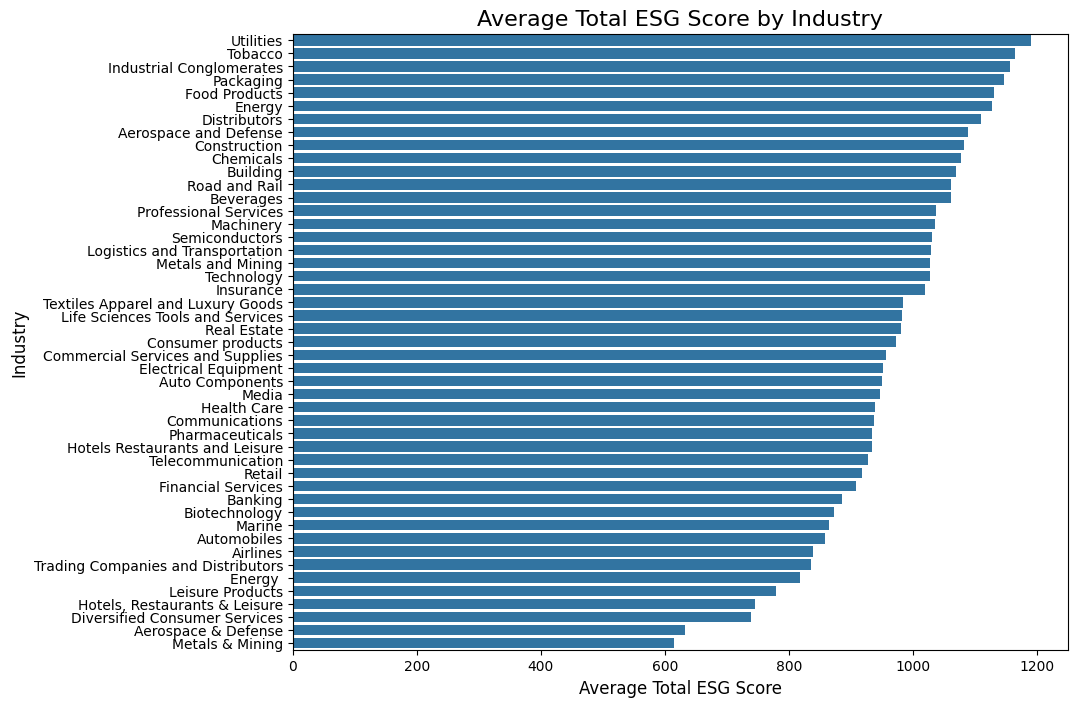

In [213]:
# Bar chart of Toatl ESG score by Industry
average_total_score_by_industry = average_total_score_by_industry.sort_values('Average Total ESG Score', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Total ESG Score', y='Industry', data=average_total_score_by_industry)

# Add labels and title
plt.title('Average Total ESG Score by Industry', fontsize=16)
plt.xlabel('Average Total ESG Score', fontsize=12)
plt.ylabel('Industry', fontsize=12)

interestingly (and somewhat predictably) - the industries with the lowest ESG scores are Metals & Mining, Aerospace & Defense, Diversified Consumer Services, Hotels, Restaurants & Leisure, Leisure Products, Auto Components, Airlines, and Automobiles. the industries with the highest ESG scores are Utilities, Tobacco, Industrial Conglomerates, Packaging, and Energy. 

future steps: sort different industries by just Environmental score, just Social score, and just Governance score to see if these differ significantly.

In [214]:
print(esg.columns)

Index(['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl',
       'environment_grade', 'environment_level', 'social_grade',
       'social_level', 'governance_grade', 'governance_level',
       'environment_score', 'social_score', 'governance_score', 'total_score',
       'last_processing_date', 'total_grade', 'total_level', 'cik',
       'Start Price', 'End Price', 'Rate of Change (%)'],
      dtype='object')


In [215]:
avg_environmental = esg.groupby('industry')['environment_score'].mean().reset_index()
avg_environmental.columns = ['Industry', 'Average Environmental Score']
print(avg_environmental.head(5))

avg_enviro = avg_environmental.sort_values(by = 'Average Environmental Score', ascending = False)
print("best environmental scores")
print(avg_enviro.head(5))

avg_enviro = avg_environmental.sort_values(by = 'Average Environmental Score', ascending = True)
print("worse environmental scores")
print(avg_enviro.head(5))

                Industry  Average Environmental Score
0    Aerospace & Defense                   225.000000
1  Aerospace and Defense                   485.000000
2               Airlines                   326.714286
3        Auto Components                   407.500000
4            Automobiles                   393.000000
best environmental scores
                    Industry  Average Environmental Score
46                 Utilities                   550.966667
24  Industrial Conglomerates                   534.666667
34                 Packaging                   530.000000
14              Distributors                   525.000000
17                    Energy                   516.611111
worse environmental scores
                         Industry  Average Environmental Score
32                Metals & Mining                   215.000000
0             Aerospace & Defense                   225.000000
26               Leisure Products                   252.333333
23  Hotels, Restaurants

In [216]:
avg_social = esg.groupby('industry')['social_score'].mean().reset_index()
avg_social.columns = ['Industry', 'Average Social Score']
print(avg_social.head(5))

avg_social = avg_social.sort_values(by = 'Average Social Score', ascending = False)
print("best social scores")
print(avg_social.head(5))

avg_social = avg_social.sort_values(by = 'Average Social Score', ascending = True)
print("worse social scores")
print(avg_social.head(5))

                Industry  Average Social Score
0    Aerospace & Defense            203.000000
1  Aerospace and Defense            305.700000
2               Airlines            265.714286
3        Auto Components            272.500000
4            Automobiles            229.250000
best social scores
                    Industry  Average Social Score
46                 Utilities            357.400000
39             Road and Rail            329.400000
44                   Tobacco            327.000000
34                 Packaging            322.666667
24  Industrial Conglomerates            318.000000
worse social scores
                         Industry  Average Social Score
32                Metals & Mining            200.000000
0             Aerospace & Defense            203.000000
4                     Automobiles            229.250000
15  Diversified Consumer Services            233.333333
23  Hotels, Restaurants & Leisure            248.500000


In [217]:
avg_governance = esg.groupby('industry')['governance_score'].mean().reset_index()
avg_governance.columns = ['Industry', 'Average Governance Score']
print(avg_governance.head(5))

avg_governance = avg_governance.sort_values(by = 'Average Governance Score', ascending = False)
print("best governance scores")
print(avg_governance.head(5))

avg_governance = avg_governance.sort_values(by = 'Average Governance Score', ascending = True)
print("worse governance scores")
print(avg_governance.head(5))

                Industry  Average Governance Score
0    Aerospace & Defense                205.000000
1  Aerospace and Defense                299.000000
2               Airlines                246.285714
3        Auto Components                270.000000
4            Automobiles                237.000000
best governance scores
                    Industry  Average Governance Score
44                   Tobacco                328.000000
14              Distributors                307.666667
24  Industrial Conglomerates                304.333333
20             Food Products                303.214286
36     Professional Services                300.500000
worse governance scores
                         Industry  Average Governance Score
32                Metals & Mining                     200.0
0             Aerospace & Defense                     205.0
15  Diversified Consumer Services                     220.0
23  Hotels, Restaurants & Leisure                     227.5
4                

#### part two

/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_30230/2624109517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=esg, x='environment_level', y='governance_score', palette='muted')


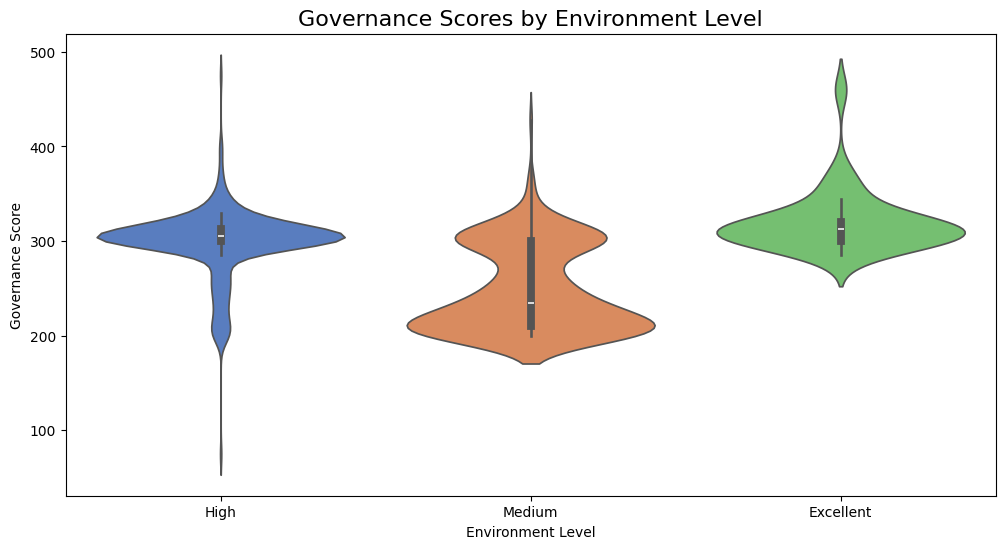

In [218]:
#Violin Plot: Governance Score by Environment Level
plt.figure(figsize=(12, 6))
sns.violinplot(data=esg, x='environment_level', y='governance_score', palette='muted')
plt.title('Governance Scores by Environment Level', fontsize=16)
plt.xlabel('Environment Level')
plt.ylabel('Governance Score')
plt.show()

Index(['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl',
       'environment_grade', 'environment_level', 'social_grade',
       'social_level', 'governance_grade', 'governance_level',
       'environment_score', 'social_score', 'governance_score', 'total_score',
       'last_processing_date', 'total_grade', 'total_level', 'cik',
       'Start Price', 'End Price', 'Rate of Change (%)'],
      dtype='object')
Correlation between Total ESG Score and Rate of Change (%): 0.2933148427717424


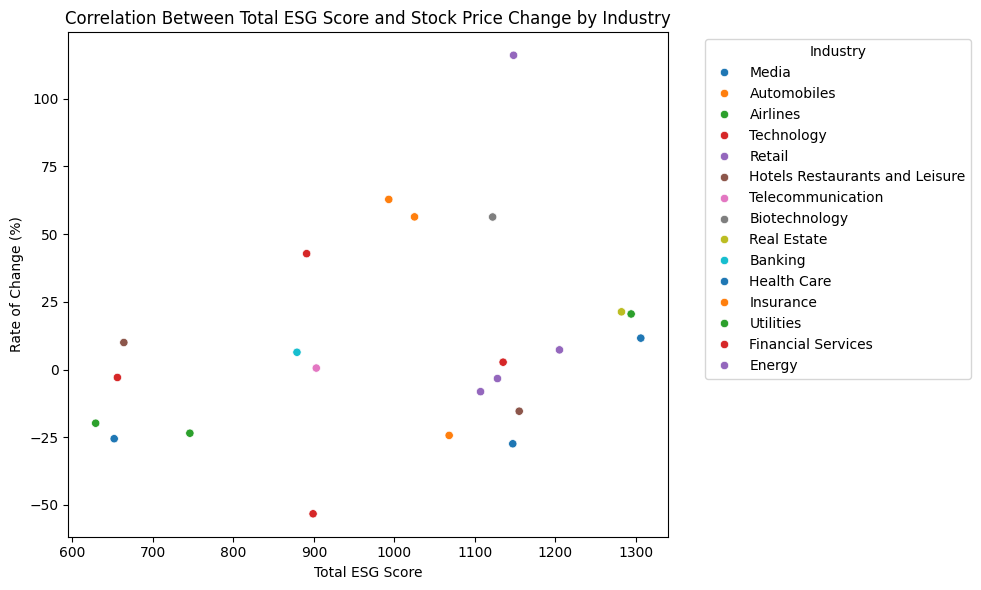

In [219]:
#violin graph 
print(relevant_esg.columns)
correlation = relevant_esg['total_score'].corr(relevant_esg['Rate of Change (%)'])
print(f'Correlation between Total ESG Score and Rate of Change (%): {correlation}')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=relevant_esg, x='total_score', y='Rate of Change (%)', hue='industry', palette='tab10')
plt.title('Correlation Between Total ESG Score and Stock Price Change by Industry')
plt.xlabel('Total ESG Score')
plt.ylabel('Rate of Change (%)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


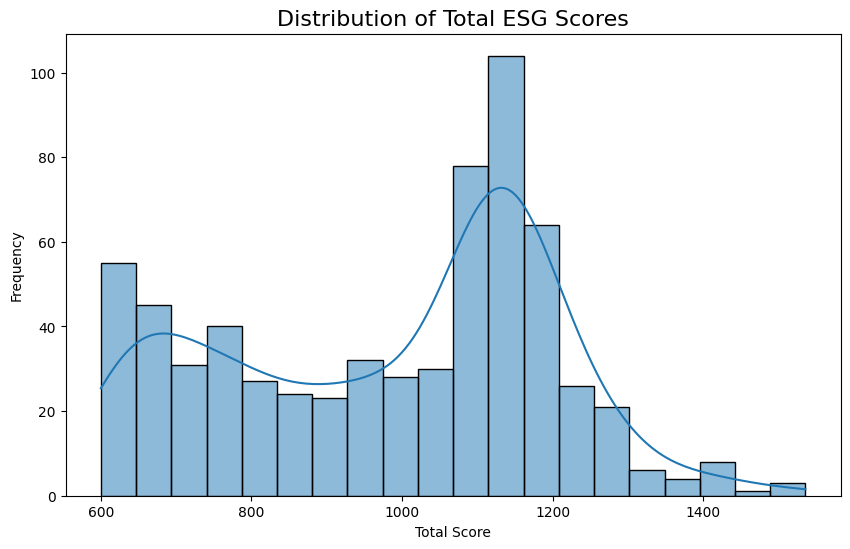

In [220]:
# Plot the distribution of total_score
plt.figure(figsize=(10, 6))
sns.histplot(esg['total_score'], kde=True, bins=20)
plt.title('Distribution of Total ESG Scores', fontsize=16)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_30230/3588776245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg, x='total_grade', y='total_score', palette='Set2')


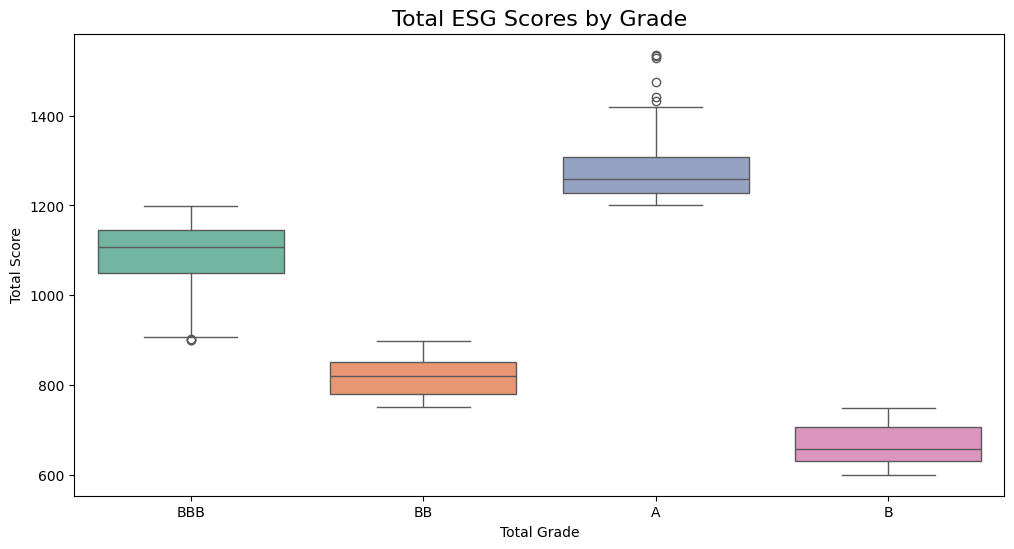

In [221]:
#Boxplot of Total Scores by Total Grade
plt.figure(figsize=(12, 6))
sns.boxplot(data=esg, x='total_grade', y='total_score', palette='Set2')
plt.title('Total ESG Scores by Grade', fontsize=16)
plt.xlabel('Total Grade')
plt.ylabel('Total Score')
plt.show()

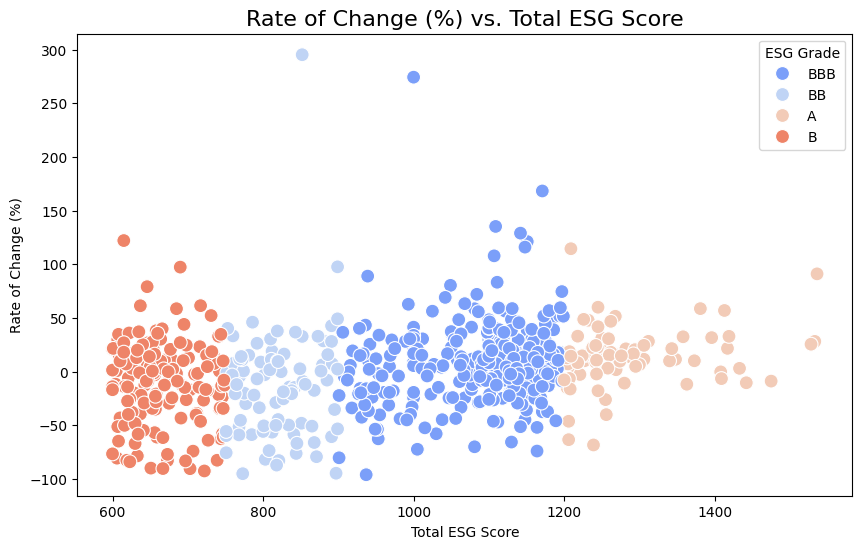

In [222]:
#Scatter Plot: Rate of Change vs. Total ESG Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=esg, x='total_score', y='Rate of Change (%)', hue='total_grade', palette='coolwarm', s=100)
plt.title('Rate of Change (%) vs. Total ESG Score', fontsize=16)
plt.xlabel('Total ESG Score')
plt.ylabel('Rate of Change (%)')
plt.legend(title="ESG Grade", loc='upper right')
plt.show()

/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_30230/3614906153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg, x='environment_grade', y='Rate of Change (%)', palette='Set2')


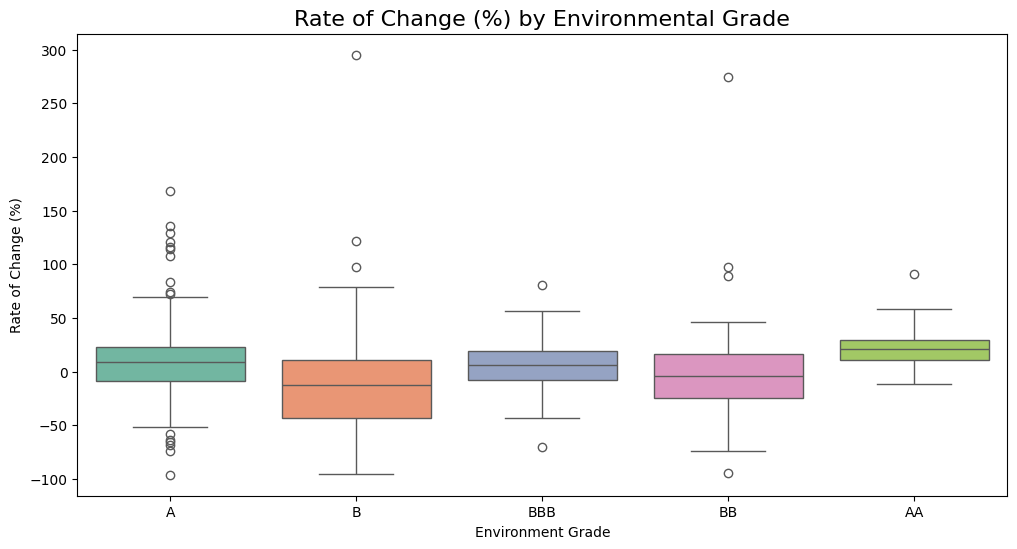

In [223]:
#Boxplot: Rate of Change by Environment Grade
plt.figure(figsize=(12, 6))
sns.boxplot(data=esg, x='environment_grade', y='Rate of Change (%)', palette='Set2')
plt.title('Rate of Change (%) by Environmental Grade', fontsize=16)
plt.xlabel('Environment Grade')
plt.ylabel('Rate of Change (%)')
plt.show()


/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_30230/4258631131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=esg, x='social_grade', y='Rate of Change (%)', palette='muted')


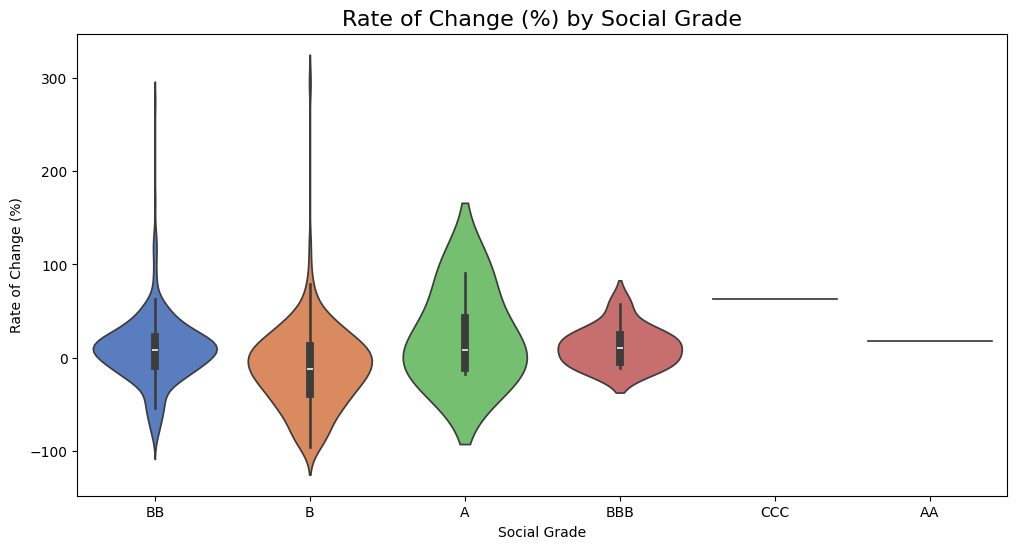

In [224]:
#Violin Plot: Rate of Change by Social Grade
plt.figure(figsize=(12, 6))
sns.violinplot(data=esg, x='social_grade', y='Rate of Change (%)', palette='muted')
plt.title('Rate of Change (%) by Social Grade', fontsize=16)
plt.xlabel('Social Grade')
plt.ylabel('Rate of Change (%)')
plt.show()


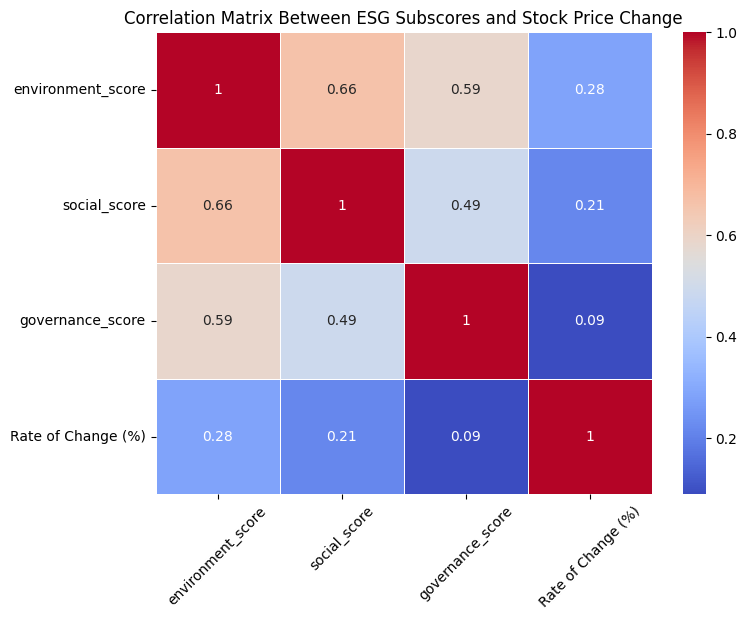

Correlation between Environmental Score and Rate of Change (%): 0.283
Correlation between Social Score and Rate of Change (%): 0.215
Correlation between Governance Score and Rate of Change (%): 0.090


In [225]:
correlation_matrix=esg[['environment_score', 'social_score', 'governance_score', 'Rate of Change (%)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between ESG Subscores and Stock Price Change')
plt.xticks(rotation=45)

plt.show()

correlation_environment = esg['environment_score'].corr(esg['Rate of Change (%)'])
correlation_social = esg['social_score'].corr(esg['Rate of Change (%)'])
correlation_governance = esg['governance_score'].corr(esg['Rate of Change (%)'])

print(f'Correlation between Environmental Score and Rate of Change (%): {correlation_environment:.3f}')
print(f'Correlation between Social Score and Rate of Change (%): {correlation_social:.3f}')
print(f'Correlation between Governance Score and Rate of Change (%): {correlation_governance:.3f}')


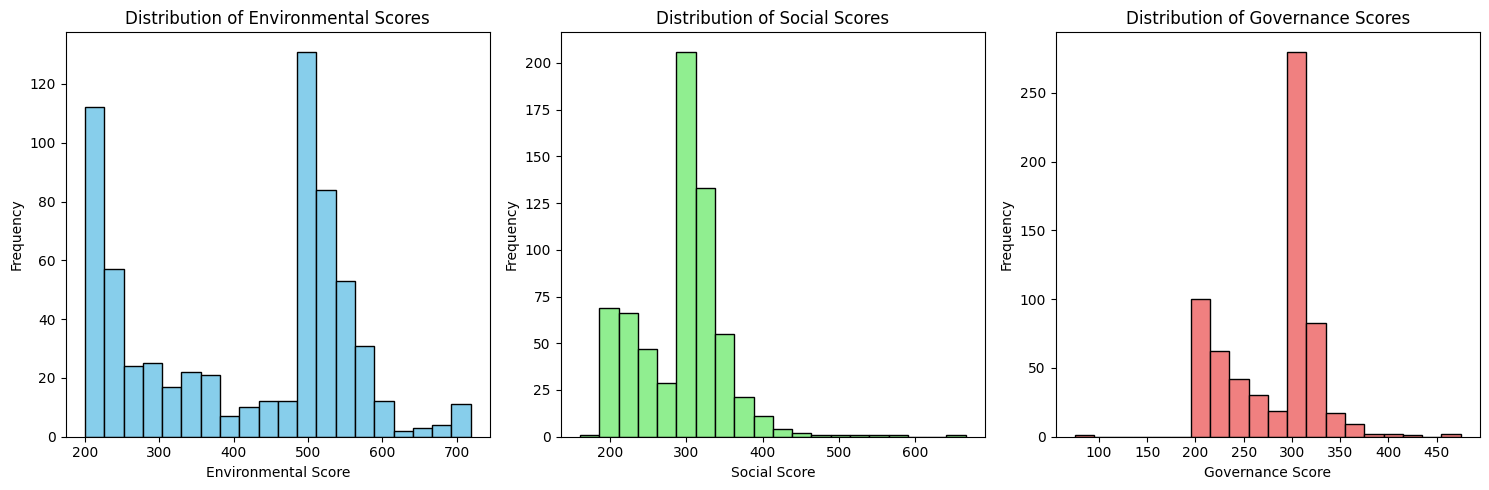

In [226]:
# Plot histograms for each ESG subscore
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(esg['environment_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Environmental Score')
plt.ylabel('Frequency')
plt.title('Distribution of Environmental Scores')

plt.subplot(1, 3, 2)
plt.hist(esg['social_score'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Social Score')
plt.ylabel('Frequency')
plt.title('Distribution of Social Scores')

plt.subplot(1, 3, 3)
plt.hist(esg['governance_score'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Governance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Governance Scores')

plt.tight_layout()
plt.show()


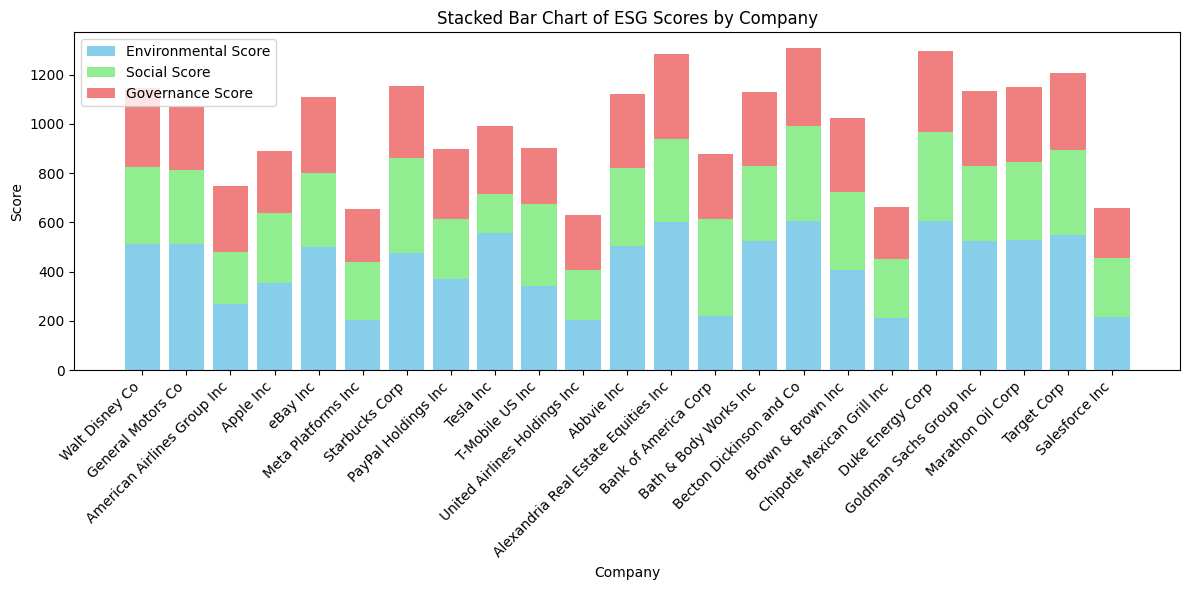

In [227]:
env_scores = relevant_esg['environment_score'].values
soc_scores = relevant_esg['social_score'].values
gov_scores = relevant_esg['governance_score'].values
filtered_companies = relevant_esg['name'].values

x = np.arange(len(filtered_companies))

plt.figure(figsize=(12, 6))
plt.bar(x, env_scores, color='skyblue', label='Environmental Score')
plt.bar(x, soc_scores, bottom=env_scores, color='lightgreen', label='Social Score')
plt.bar(x, gov_scores, bottom=env_scores + soc_scores, color='lightcoral', label='Governance Score')

plt.xticks(x, filtered_companies, rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('Score')
plt.title('Stacked Bar Chart of ESG Scores by Company')
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  23 of 23 completed


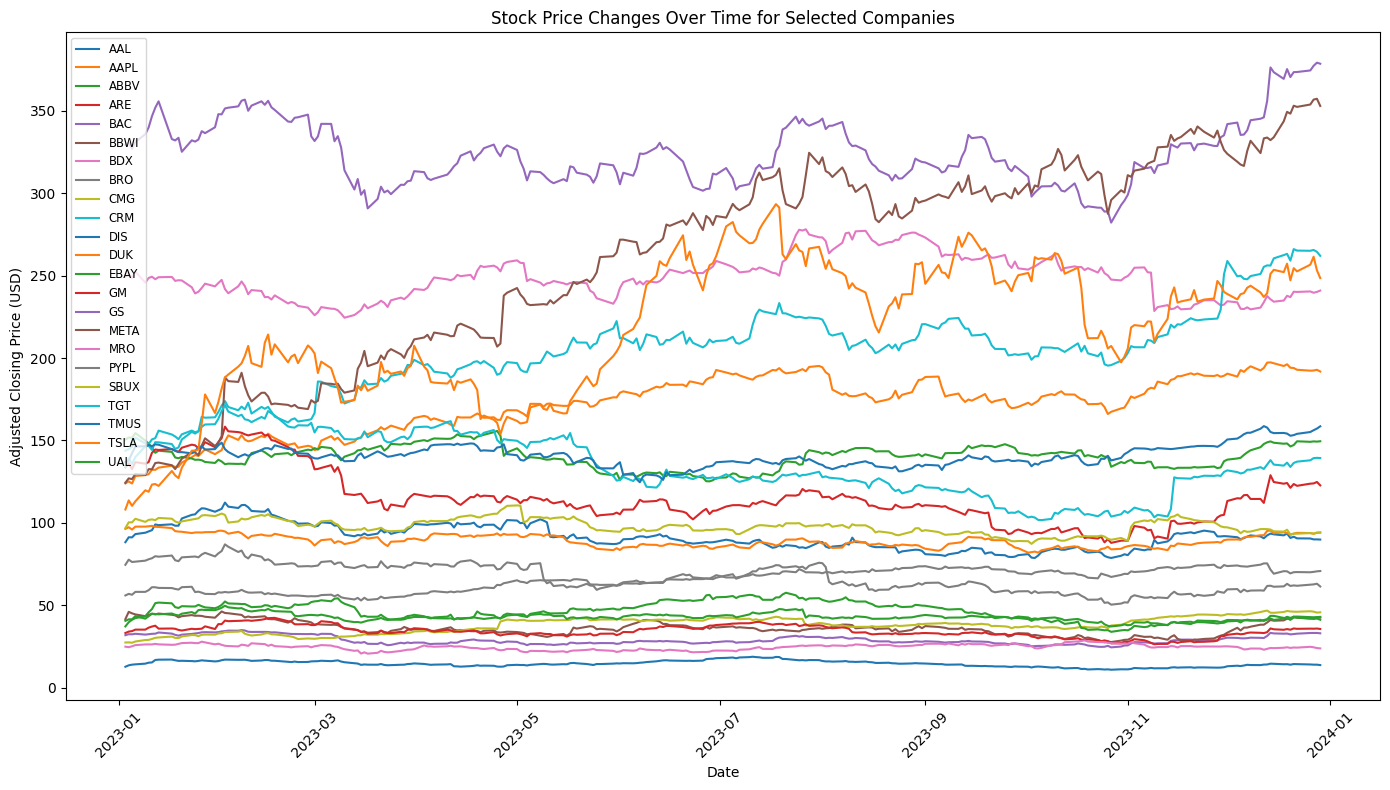

In [228]:
data = yf.download(list(relevant_esg['ticker']), start='2023-01-01', end='2024-01-01')['Adj Close']
        

plt.figure(figsize=(14, 8))
for ticker in data.columns:
    plt.plot(data.index, data[ticker], label=ticker)

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.title('Stock Price Changes Over Time for Selected Companies')
plt.legend(loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [229]:
X = relevant_esg[['environment_score', 'social_score','governance_score']]   # Independent variables
y = relevant_esg['Rate of Change (%)']   # Dependent variable

model = LinearRegression().fit(X, y)
print(f"Environmental Score Coefficient: {model.coef_[0]}")
print(f"Social Score Coefficient: {model.coef_[1]}")
print(f"Governance Score Coefficient: {model.coef_[2]}")
print(f"Intercept: {model.intercept_}")


Environmental Score Coefficient: 0.1079341804300019
Social Score Coefficient: -0.023698725388349346
Governance Score Coefficient: -0.07501676055180559
Intercept: -8.825036870813836


### Regression Coefficients Interpretation

For every 1-unit increase in the Environmental score (assuming all other factors remain constant), the stock return is expected to increase by 0.1079 units. The positive coefficient suggests that higher Environmental scores are associated with better stock performance (or higher returns).

For every 1-unit increase in the Social score (with other variables constant), the stock return is expected to decrease by 0.0237 units. The negative coefficient indicates that better Social scores might be associated with lower stock performance, but generally, since the coefficient is so close to 0, Social scores seem to have little impact on stock performance.

For every 1-unit increase in the Governance score (with other variables constant), stock return is expected to decrease by 0.0750 units. This negative coefficient suggests that improvements in governance (e.g., stricter regulation or more ethical practices) are associated with slightly lower stock returns. This could imply that governance improvements come at a financial cost.


In [230]:
esg_corr = relevant_esg.loc[:, ['environment_score', 'social_score',
                                'governance_score']] 
print(esg_corr.corr(numeric_only=True))

                   environment_score  social_score  governance_score
environment_score           1.000000      0.443407          0.866404
social_score                0.443407      1.000000          0.548976
governance_score            0.866404      0.548976          1.000000


In [231]:
print(esg_corr.cov(numeric_only=True))

                   environment_score  social_score  governance_score
environment_score       20758.632411   3947.505929       5092.833992
social_score             3947.505929   3818.059289       1383.930830
governance_score         5092.833992   1383.930830       1664.482213


### Correlation and Covariance 

Let's observe the correlation/covariance between the different ESG scores themselves! All the correlations are positive, meaning that there is positive correlation between the scores (when one increases, the other does too). Governance and Environment have a particularly strong correlation, suggesting that companies who invest in environmental factors likely also care about governance (or perhaps some government regulations align with environmental issues). On the other hand, social factors seem to have just a moderately positive relationship with both the other variables.

While the covariance values agree with these claims, it's interesting to note how large the variance is for Environmental Scores (20758.63). This suggests that there is a large spread in environmental performance among the companies we chose, while governance scores are much more consistent.

---

### Questions for Reviewers

1. After combining our yfinance and ESG data, do we have large enough datasets to satisfy the complexity requirement for the research question?
   
2. Any advice recommanded to follow when we trying to take sample from the population? maybe by industry? how many industry to take sample from? maybe stratify to include all ESG grade? (as a reminder - we have one big dataset with 700+ companies and joined data that we did some EDA with, but we also want to include a smaller sample dataset so we can look at some individual companies as well).
   
3. How many visualization and statistics are recommanded for the final project? (ballpark range would be helpful) Do the visualizations we currently have seem like they're on the right path for the final phases?
   
4. Regarding the visualizations and chunks we have made for our EDA so far: should we explore these specific visualizations more in depth? OR should we expand our DA to other variables in the datasets that we maybe haven't used yet?